# 🏡 Ames Housing - Exploratory Data Analysis (EDA)

## 📌 Introduction
The **Ames Housing dataset** contains information about houses sold in Ames, Iowa. 
This report aims to explore the dataset, identify key patterns, and understand the main factors affecting house prices.

### 🎯 Objectives
- Understand the dataset structure
- Handle missing values
- Perform visualizations to detect patterns
- Identify important features influencing **Sale Price**
- Prepare the dataset for potential machine learning models

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load dataset
df = pd.read_csv("C:/Users/HP/Documents/IA/Kaggle/ames-housing-eda/ames-housing-eda/data/archive/AmesHousing.csv")

# Display first rows
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 📊 Dataset Overview

The **Ames Housing dataset** contains **82 columns** describing various attributes of houses sold in Ames, Iowa.  
Each row represents a **single house sale**, with details on:
- **Lot and Land Attributes** (e.g., `LotArea`, `LotShape`, `LandContour`)
- **House Characteristics** (e.g., `OverallQual`, `YearBuilt`, `TotalBsmtSF`)
- **External Features** (e.g., `PoolQC`, `Fence`, `MiscFeature`)
- **Sale Information** (`SalePrice`, `SaleType`, `SaleCondition`)

The target variable in this dataset is **`SalePrice`**, which represents the final selling price of the house.


# 🛑 Missing Values

Missing values can significantly affect our analysis.  
In this section, we will:
- Identify which features have missing values.
- Decide whether to remove or impute them.


In [2]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Select only columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing values
missing_values


Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64

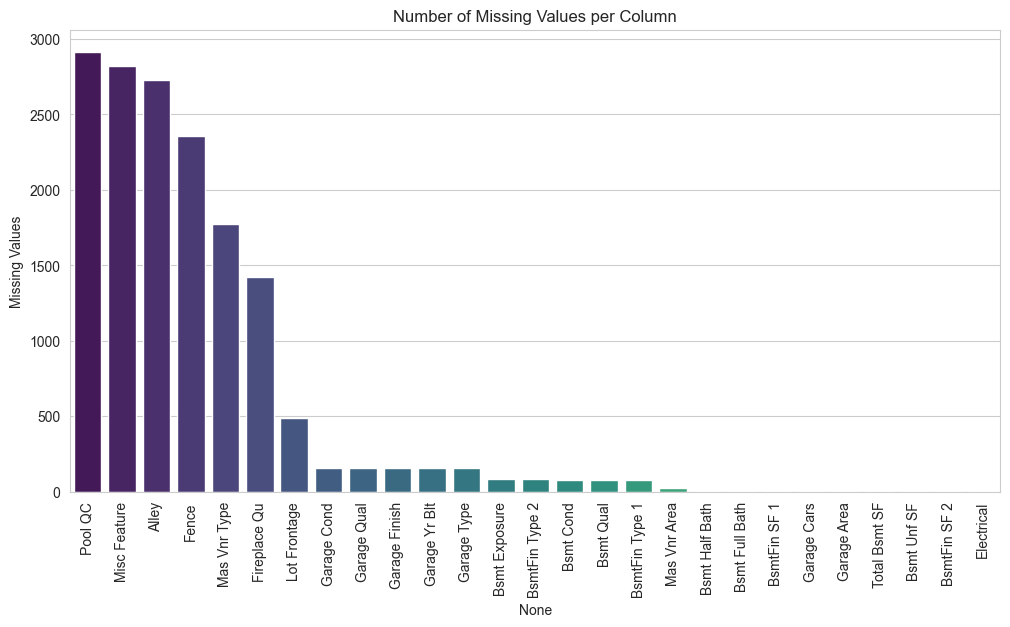

In [3]:
# Plot missing values
plt.figure(figsize=(12,6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.title("Number of Missing Values per Column")
plt.ylabel("Missing Values")
plt.show()


## 🔎 Missing Values Overview
The dataset contains **several missing values** across multiple features.  
Below is the breakdown of missing values per column:

| Feature | Missing Values | Interpretation |
|---------|----------------|----------------|
| `PoolQC` | 2917 | Most houses **do not have a pool** |
| `MiscFeature` | 2824 | Very few houses have miscellaneous features |
| `Alley` | 2732 | Most houses do **not have alley access** |
| `Fence` | 2358 | Many houses **lack a fence** |
| `MasVnrType` | 1775 | Missing values in masonry veneer type |
| `FireplaceQu` | 1422 | Missing values likely mean **no fireplace** |
| `LotFrontage` | 490 | Some houses **lack recorded lot frontage** |
| `GarageCond`, `GarageQual`, `GarageFinish` | 159 | Likely missing for houses with **no garage** |
| `BsmtExposure`, `BsmtFinType1`, `BsmtQual` | 80-83 | Missing values indicate **no basement** |
| `Electrical` | 1 | **Only one missing value**, can be easily filled |

---

## 🔥 Key Observations
- **Most missing values come from features that do not apply to all houses**, such as `PoolQC`, `Fence`, and `Alley`.
- Features like **garage-related and basement-related attributes** are likely missing because **some houses do not have a garage or basement**.
- `LotFrontage` has a **significant number of missing values**, which may require **imputation** rather than removal.  



# 🛠️ Handling Missing Values

## 🔍 Step 1: Identifying Data Types  
Before handling missing values, we must **determine the type of each feature** (numerical or categorical).  
This is important because different types of data require different **imputation strategies**:
- **Numerical Features (`int64`, `float64`)**: These represent continuous or discrete numerical values (e.g., `LotFrontage`, `GarageYrBlt`).
- **Categorical Features (`object`)**: These represent text-based classifications (e.g., `PoolQC`, `Fence`, `Alley`).

We first check the data types of all columns with missing values.


In [4]:
# List of all columns with missing values
columns_to_check = [
    "Pool QC", "Misc Feature", "Alley", "Fence", "Mas Vnr Type", "Fireplace Qu",
    "Lot Frontage", "Garage Cond", "Garage Qual", "Garage Finish", "Garage Yr Blt", "Garage Type",
    "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Cond", "Bsmt Qual", "BsmtFin Type 1",
    "Mas Vnr Area", "Bsmt Half Bath", "Bsmt Full Bath", "BsmtFin SF 1", "Garage Cars",
    "Garage Area", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "Electrical"
]

# Check which columns exist in df
existing_columns = [col for col in columns_to_check if col in df.columns]

# Display data types for columns that exist in df
df[existing_columns].dtypes



Pool QC            object
Misc Feature       object
Alley              object
Fence              object
Mas Vnr Type       object
Fireplace Qu       object
Lot Frontage      float64
Garage Cond        object
Garage Qual        object
Garage Finish      object
Garage Yr Blt     float64
Garage Type        object
Bsmt Exposure      object
BsmtFin Type 2     object
Bsmt Cond          object
Bsmt Qual          object
BsmtFin Type 1     object
Mas Vnr Area      float64
Bsmt Half Bath    float64
Bsmt Full Bath    float64
BsmtFin SF 1      float64
Garage Cars       float64
Garage Area       float64
Total Bsmt SF     float64
Bsmt Unf SF       float64
BsmtFin SF 2      float64
Electrical         object
dtype: object

### **1️⃣ Categorical Features (`object`)**:
   - Features like `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Mas Vnr Type`, `Fireplace Qu`, `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Type`, `Bsmt Exposure`, `BsmtFin Type 2`, `Bsmt Cond`, `Bsmt Qual`, and `BsmtFin Type 1` are categorical.
   - Many of these represent **optional house attributes** (e.g., pools, fences, basements, and garages).
   - Missing values likely **indicate absence**, meaning the house **does not have that feature**.

### **2️⃣ Numerical Features (`float64`)**:
   - Features like `Lot Frontage`, `Garage Yr Blt`, `Mas Vnr Area`, `Bsmt Half Bath`, `Bsmt Full Bath`, `BsmtFin SF 1`, `Garage Cars`, `Garage Area`, `Total Bsmt SF`, `Bsmt Unf SF`, and `BsmtFin SF 2` are numerical.
   - **For `Lot Frontage` and `Mas Vnr Area`**, missing values likely occur due to **lack of recorded data** rather than feature absence.
   - **For garage-related and basement-related numerical features**, missing values **indicate that the house has no garage or basement**, so they should be filled with `0` instead of the median.

---


## 🏗️ Step 2: Imputation Strategy  

| Feature Type   | Strategy Applied  | Justification  |
|---------------|------------------|----------------|
| **Categorical** | Filled with `"None"` | Missing values indicate the **absence** of a feature (e.g., no pool, no garage, no basement). This approach preserves categorical information. |
| **Numerical (Recorded Data Missing)**  | Filled with **median** | For features like `Lot Frontage` and `Mas Vnr Area`, missing values are likely **unrecorded data**, so we use the **median** to avoid skewing caused by outliers. |
| **Numerical (Feature Absence)** | Filled with **0** | For features related to **garages (`Garage Cars`, `Garage Area`)** and **basements (`Total Bsmt SF`, `BsmtFin SF 1`)**, missing values indicate **the house does not have this feature**, so we fill them with `0`. |



In [5]:
# 🏗️ Fill categorical missing values with "None"
categorical_features = [
    "Pool QC", "Misc Feature", "Alley", "Fence", "Mas Vnr Type", "Fireplace Qu",
    "Garage Cond", "Garage Qual", "Garage Finish", "Garage Type",
    "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "Electrical"
]
for col in categorical_features:
    df[col] = df[col].fillna("None")

# 🔢 Fill numerical missing values with the median (data is missing, not absent)
numerical_features_with_median = ["Lot Frontage", "Mas Vnr Area"]
for col in numerical_features_with_median:
    df[col] = df[col].fillna(df[col].median())

# 🚗 Fill numerical missing values with 0 (feature is absent, not missing)
numerical_features_with_zero = [
    "Garage Yr Blt", "Garage Cars", "Garage Area", 
    "BsmtFin SF 1", "BsmtFin SF 2", "Total Bsmt SF", "Bsmt Unf SF",
    "Bsmt Full Bath", "Bsmt Half Bath"
]
for col in numerical_features_with_zero:
    df[col] = df[col].fillna(0)


In [6]:
# ✅ Final check for missing values
print(f"Total missing values remaining: {df.isnull().sum().sum()}")


Total missing values remaining: 0


# 📊 SalePrice Exploration

## 🔍 Why Analyze `SalePrice`?
The **SalePrice** variable represents the **final selling price of houses**, making it the most critical feature in our dataset.  
Before performing predictive modeling, we need to **fully understand its distribution, trends, and potential outliers**.

### 🏗️ Objectives:
- **Visualize the distribution** of `SalePrice`.
- **Calculate key statistics** (mean, median, standard deviation).
- **Check for skewness** (asymmetry in distribution).
- **Identify potential outliers** that could affect modeling.

### 🔬 Expected Insights:
- Is the distribution **normal or skewed**?
- Are there **extreme values** (outliers) that need attention?
- Does `SalePrice` need **a transformation (e.g., log-scale)** for better modeling?

---
🔽 **Let’s begin by visualizing the distribution of `SalePrice`.**


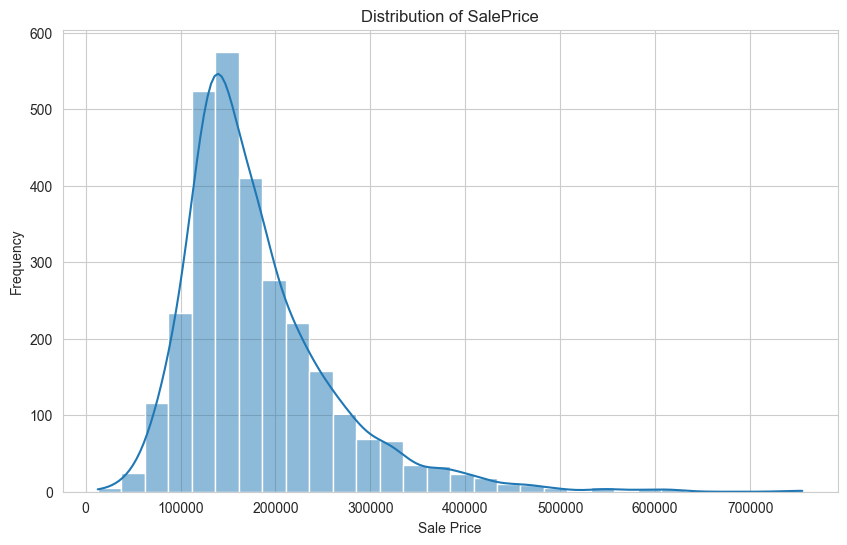

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Histogram of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()


In [8]:
df["SalePrice"].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
from scipy.stats import skew

saleprice_skew = skew(df["SalePrice"])
print(f"Skewness of SalePrice: {saleprice_skew:.2f}")


Skewness of SalePrice: 1.74


### 🔍 **Findings**
- The `SalePrice` distribution is **right-skewed** with a skewness value of **1.74**, indicating a strong **positive asymmetry**.
- The **mean price (180,796)** is **higher than the median price (160,000)**, confirming the influence of **high-value properties**.
- The **minimum house price is 12,789**, while the **maximum reaches 755,000**, showing a **large range** in home values.
- The presence of **outliers** (houses priced above **500,000**) could impact model performance.

---

### 🚀 **Implications for Modeling**
✔ **Potential Issues with Skewness**  
   - Right-skewed distributions can **violate the assumptions of linear regression**, affecting model accuracy.
   - Models like **Linear Regression and KNN** assume **normally distributed target variables**, making this skew problematic.

✔ **Solution: Log Transformation of `SalePrice`**  
   - Applying a **log transformation (`log(SalePrice)`)** can **normalize the distribution**.
   - This reduces the impact of **extreme values** and improves **model stability**.

✔ **Handling Outliers**  
   - Extreme values (luxury houses) could **distort regression results**.
   - We may need to **detect and potentially remove outliers** to improve predictive accuracy.

---

## 🔄 Log Transformation of `SalePrice`
The `SalePrice` distribution is **right-skewed** with a skewness value of **1.74**.  
A highly skewed target variable can negatively impact **machine learning models**, especially **linear regression**, which assumes normally distributed residuals.

### 📊 **Benefits of Log Transformation**
✔ **Reduces Skewness** → Makes the distribution **closer to normal**, improving model performance.  
✔ **Stabilizes Variance** → Helps models treat different price ranges more **evenly**.  
✔ **Reduces Impact of Outliers** → Prevents extremely high prices from **distorting predictions**.  

---

### 🔧 **Next Step: Applying Log Transformation**
We will apply a **natural logarithm transformation (`log(SalePrice)`)** and visualize the new distribution.


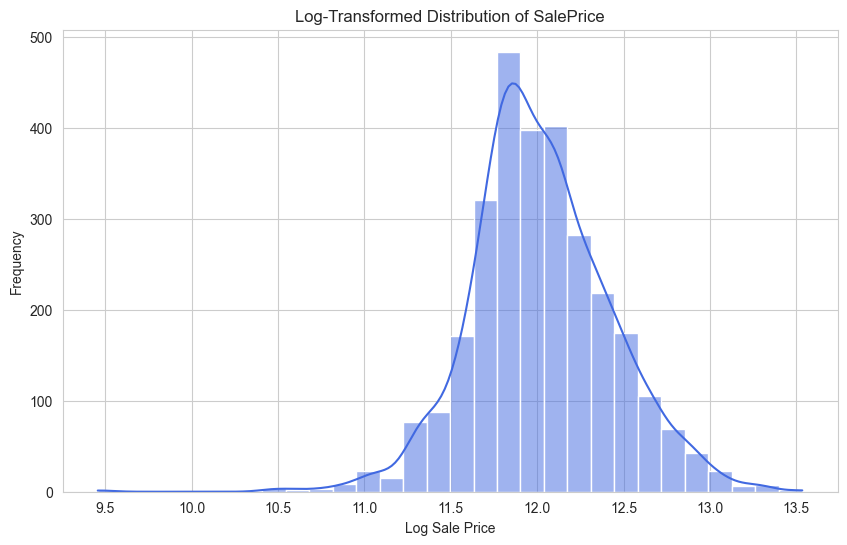

Skewness after Log Transformation: -0.01


In [10]:
# Apply log transformation
df["Log_SalePrice"] = np.log(df["SalePrice"])

# Plot the new distribution
plt.figure(figsize=(10,6))
sns.histplot(df["Log_SalePrice"], bins=30, kde=True, color="royalblue")
plt.xlabel("Log Sale Price")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of SalePrice")
plt.show()

# Check skewness after transformation
log_skewness = skew(df["Log_SalePrice"])
print(f"Skewness after Log Transformation: {log_skewness:.2f}")


### 📊 **Final Observations**
- After applying the **log transformation (`log(SalePrice)`)**, the distribution has become **approximately normal**.
- The new skewness value is **-0.01**, which is very close to 0, confirming that the transformation effectively removed the previous right-skewness.
- The peak of the distribution is now **centered**, and the long tail on the right has significantly **reduced**.

### 🚀 **Impact on Modeling**
✔ **Improved Normality** → Many machine learning models, especially **linear regression**, assume normality of the target variable.  
✔ **Reduced Impact of Outliers** → Extreme values have a **lower influence** after transformation.  
✔ **Better Linearity** → Relationships between features and the target variable (`SalePrice`) are now more **linear**, which benefits models like **linear regression**.

---

📌 **Now that `SalePrice` is normalized, we can proceed to feature analysis.**

## 📊 Exploring Feature Relationships with Log_SalePrice

### 🔍 **Why Analyze Feature Relationships?**
Understanding how different features correlate with `Log_SalePrice` is **critical** for building a predictive model.  
Some key objectives: 

✔ Identify **strong predictors** that have a high impact on house prices.  
✔ Detect **weak or irrelevant features** that do not contribute much to the prediction.  
✔ Check **linear relationships**, as some models (like linear regression) assume a linear association.  

### 📌 **Next Steps**
We will analyze:

1️⃣ **Numerical Features** → Correlation with `Log_SalePrice` using a heatmap.  
2️⃣ **Categorical Features** → Impact on `Log_SalePrice` using boxplots.  
3️⃣ **Multicollinearity** → Identify redundant features to avoid overfitting.

---
🔽 Let's begin by analyzing the correlation between numerical features and `Log_SalePrice`.


Overall Qual      0.825645
Gr Liv Area       0.695862
Garage Cars       0.674878
Garage Area       0.650766
Total Bsmt SF     0.625622
Year Built        0.615484
1st Flr SF        0.602629
Year Remod/Add    0.586153
Full Bath         0.577334
TotRms AbvGrd     0.492579
Name: Log_SalePrice, dtype: float64


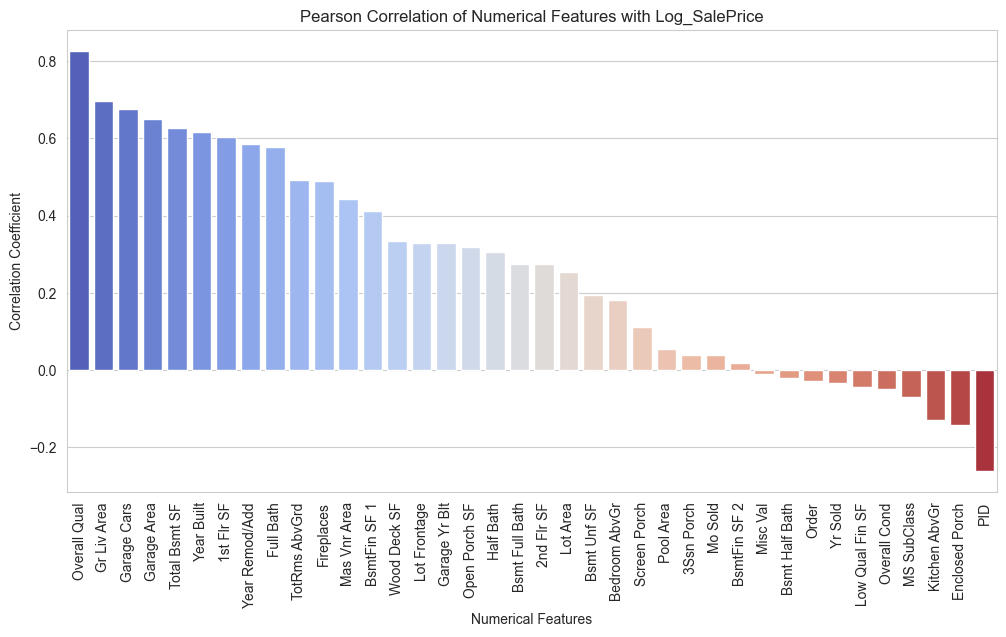

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlations with Log_SalePrice
corr_target = correlation_matrix["Log_SalePrice"].drop(["Log_SalePrice", "SalePrice"]).sort_values(ascending=False)

# Display top 10 most correlated numerical features 
print(corr_target.head(10))

# Drop SalePrice 
correlation_matrix = correlation_matrix.drop(["SalePrice"], axis=0).drop(["SalePrice"], axis=1)

# Visualizing correlation using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_target.index, y=corr_target.values, hue=corr_target.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.title("Pearson Correlation of Numerical Features with Log_SalePrice")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Numerical Features")
plt.show()


### 🔑 **Top Numerical Predictors of House Price**

🏆 **🏠 Overall Quality (`Overall Qual`) → 0.826** Higher-quality houses consistently sell for higher prices.

📏 **📐 Above Ground Living Area (`Gr Liv Area`) → 0.696** Larger houses are more expensive, confirming that size matters.

🚗 **🛠 Garage Features (`Garage Cars` → 0.675, `Garage Area` → 0.651)** More garage spaces and a larger size significantly impact price.

🏡 **🏢 Basement Size (`Total Bsmt SF`) → 0.626** Bigger basements mean higher home value, adding extra living/storage space.

📅 **⏳ Year Built & Renovations (`Year Built` → 0.615, `Year Remod/Add` → 0.586)** Newer houses and renovations increase price, as buyers prefer modern homes.

🚿 **🛁 Bathrooms & Total Rooms (`Full Bath` → 0.577, `TotRms AbvGrd` → 0.493)** More bathrooms and rooms add value, but less than other factors.


🔽 Let's continue by analyzing the correlation between categorical features and Log_SalePrice.

## 🔍 Handling Categorical Variables in Correlation Analysis

To integrate categorical variables into a correlation analysis, different encoding techniques can be used depending on the type of categorical data:

#### ✅ **Ordinal Features (Ordered Categories)**
For categorical features that have a natural order (e.g., quality ratings from Poor to Excellent), **numerical encoding** is appropriate. This means assigning numerical values to categories based on their ranking.  

Example:  
- `Fireplace Qu`: {Ex: 5, Gd: 4, TA: 3, Fa: 2, Po: 1, None: 0}
- `Garage Finish`: {Fin: 3, RFn: 2, Unf: 1, None: 0}

👉 **Why?** This transformation preserves the ordinal nature of the data, allowing us to compute **Spearman's correlation**, which measures monotonic relationships.

#### ❌ **Nominal Features (Unordered Categories)**
For categorical variables with no inherent order (e.g., different garage types or masonry veneer types), **One-Hot Encoding (OHE)** is used. This technique creates a new binary column for each category.

Example:  
- `Garage Type`: Creates columns like `GarageType_Attchd`, `GarageType_Detchd`, etc., each containing 0 or 1.  
- `Mas Vnr Type`: Creates columns like `MasVnrType_BrkFace`, `MasVnrType_Stone`, etc.

👉 **Why?** Since these categories have no ranking, **One-Hot Encoding** ensures that they are treated as independent factors in the correlation analysis.


### 🔽 Next Steps: Applying These Methods
1️⃣ **Ordinal Features** → Encode as numerical values and compute **Spearman’s correlation** with `Log_SalePrice`.  
2️⃣ **Nominal Features** → Apply **One-Hot Encoding** and measure association using **Cramér’s V** or the **Chi-Square test**.   


In [12]:
# Identifying ordinal categorical features
ordinal_features = {
    "Pool QC": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "NA": 0},
    "Fence": {"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "NA": 0},
    "Fireplace Qu": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "Garage Cond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "Garage Qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "Garage Finish": {"Fin": 3, "RFn": 2, "Unf": 1, "NA": 0},
    "Bsmt Exposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0},
    "BsmtFin Type 1": {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0},
    "BsmtFin Type 2": {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0},
    "Bsmt Qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "Bsmt Cond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "Electrical": {"SBrkr": 4, "FuseA": 3, "FuseF": 2, "FuseP": 1, "Mix": 0}
}

# Mapping ordinal features to numerical values
for col, mapping in ordinal_features.items():
    df[col] = df[col].map(mapping)

# Identifying nominal categorical features
nominal_features = ["Misc Feature", "Alley", "Garage Type", "Mas Vnr Type"]

# Applying One-Hot Encoding to nominal categorical features
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)



Now, let's analyze the correlation! 🚀

Spearman Correlation of Ordinal Features with Log_SalePrice:
 Bsmt Qual         0.686330
Pool QC           0.614898
Garage Finish     0.587979
BsmtFin Type 1    0.359034
Bsmt Exposure     0.335721
Electrical        0.295186
Fireplace Qu      0.269263
Garage Qual       0.238467
Fence             0.238088
Garage Cond       0.200006
Bsmt Cond         0.197349
BsmtFin Type 2   -0.049567
dtype: float64

Cramér's V for Nominal Features:
                       Cramér's V  Cramér's V Rescaled
Mas Vnr Type_Stone      0.724072             0.448145
Garage Type_BuiltIn     0.717060             0.434121
Garage Type_CarPort     0.709962             0.419925
Garage Type_Attchd      0.693640             0.387280
Mas Vnr Type_None       0.678638             0.357276
Garage Type_Detchd      0.659849             0.319699
Garage Type_None        0.658399             0.316798
Mas Vnr Type_BrkFace    0.647318             0.294637
Alley_Pave              0.601577             0.203155
Alley_None              

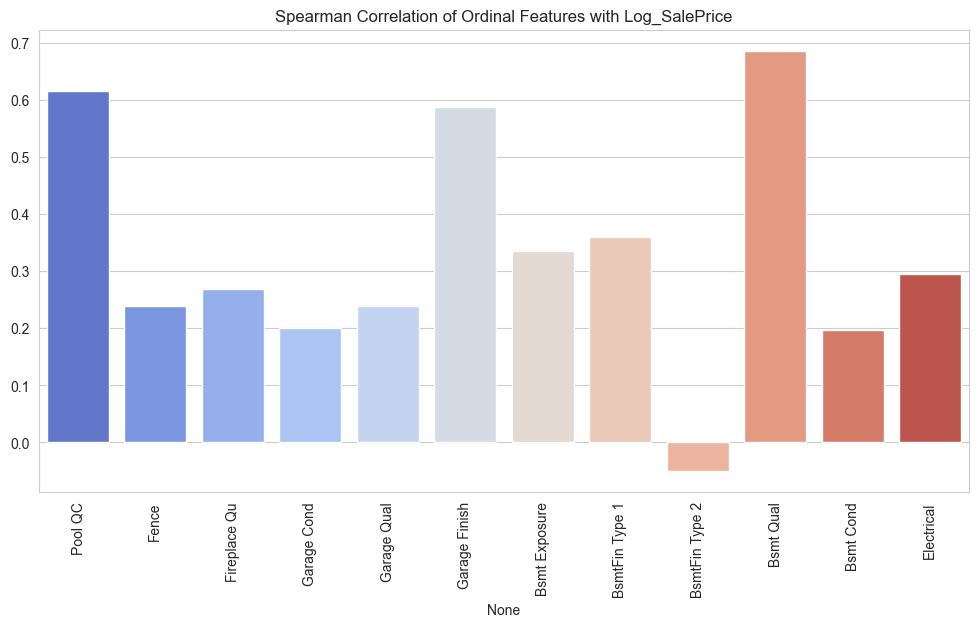

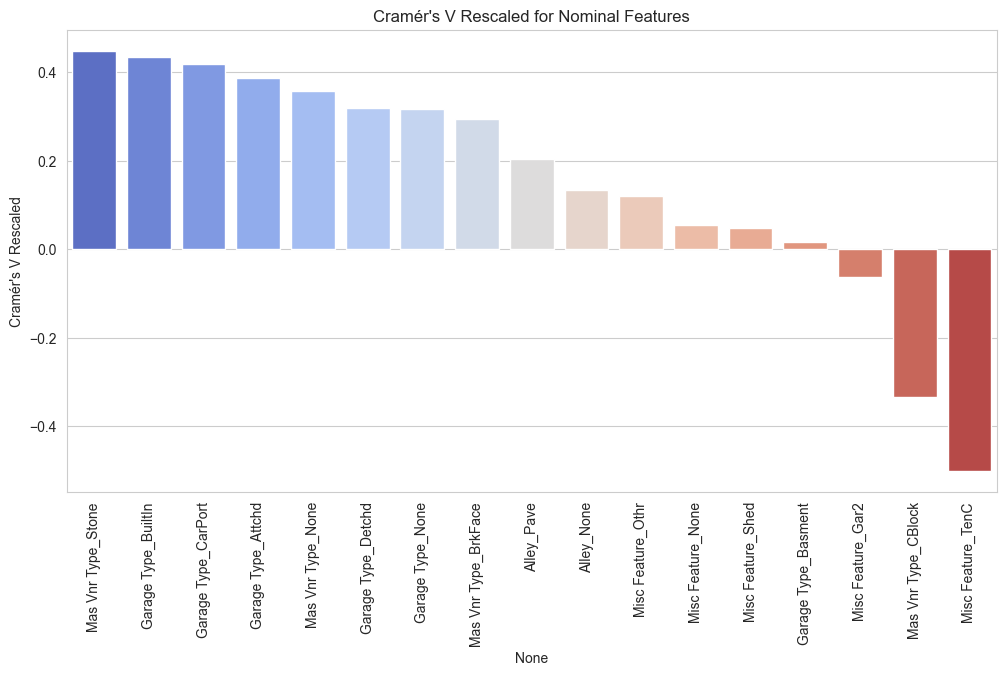

In [13]:
from scipy.stats import chi2_contingency

# Correlation of ordinal categorical features with Log_SalePrice using Spearman
spearman_corr = df[list(ordinal_features.keys())].corrwith(df["Log_SalePrice"], method="spearman")
print("Spearman Correlation of Ordinal Features with Log_SalePrice:\n", spearman_corr.sort_values(ascending=False))

# Computing Cramér’s V for nominal categorical features
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér's V for each nominal categorical feature
cramers_v_results = {col: cramers_v(df[col], df["Log_SalePrice"]) for col in df.columns if col.startswith(tuple(nominal_features))}

# Creating a DataFrame for Cramér’s V results
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient="index", columns=["Cramér's V"]).sort_values(by="Cramér's V", ascending=False)

# Rescale Cramér's V to match the [-1, 1] range for comparison
cramers_v_df["Cramér's V Rescaled"] = 2 * cramers_v_df["Cramér's V"] - 1

print("\nCramér's V for Nominal Features:\n", cramers_v_df)

# Visualizing the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=spearman_corr.index, y=spearman_corr.values, hue=spearman_corr.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.title("Spearman Correlation of Ordinal Features with Log_SalePrice")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=cramers_v_df.index, y=cramers_v_df["Cramér's V Rescaled"], hue=cramers_v_df.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.title("Cramér's V Rescaled for Nominal Features")
plt.show()


We have analyzed both **ordinal categorical features** (using **Spearman’s correlation**) and **nominal categorical features** (using **Cramér’s V rescaled**). Here are the key takeaways:

---

### 🔑 Key Insights

#### Top Influential Ordinal Features (Spearman’s Correlation)
- 🏠 **Basement Quality (Bsmt Qual) → 0.686** → The strongest ordinal predictor! A high-quality basement significantly increases house prices.
- 🏊 **Pool Quality (Pool QC) → 0.615** → High-quality pools add value to a property.
- 🚗 **Garage Finish → 0.588** → A well-finished garage enhances home prices.
- 📏 **Basement Finishing Type 1 → 0.359** → More finished basements = higher home value.
- 🔥 **Fireplace Quality, Garage Quality & Fences** show moderate positive correlations, meaning they slightly contribute to higher prices.
- ❌ **Basement Finishing Type 2 (-0.050)** → No significant impact on price.

---

#### Top Influential Nominal Features (Cramér’s V)
- 🏗 **Masonry Veneer & Garage Type** have the strongest impact:
  - Stone veneer (0.448) → Often found in luxury houses.
  - Built-in & Attached Garages (~0.4) → More convenient = Higher price.
  - Detached or No Garage (~0.3) → Less desirable.
- 🛣 **Paved Alleys (0.203)** → Slight influence on house prices.
- 🏠 **Miscellaneous Features** (e.g., sheds, extra structures) → Weak or negative impact.
- ⚠ **Some materials/features** (e.g., CBlock veneer, Misc Feature TenC) negatively impact house value.


### 🏆 **Final Insights: Comparing Numerical & Categorical Features**
We now compare **numerical, ordinal, and nominal features** based on their correlation with `Log_SalePrice`.

---

#### 📊 **Top Features Ranked by Correlation**
| Rank | Feature Type | Feature Name | Correlation |
|------|-------------|-------------|-------------|
| 🥇 1 | **Numerical** | Overall Quality (`Overall Qual`) | **0.826** |
| 🥈 2 | **Numerical** | Above Ground Living Area (`Gr Liv Area`) | **0.696** |
| 🥉 3 | **Ordinal** | Basement Quality (`Bsmt Qual`) | **0.686** |
| 4 | **Numerical** | Garage Cars (`Garage Cars`) | **0.675** |
| 5 | **Numerical** | Garage Area (`Garage Area`) | **0.651** |
| 6 | **Numerical** | Total Basement Size (`Total Bsmt SF`) | **0.626** |
| 7 | **Numerical** | Year Built (`Year Built`) | **0.615** |
| 8 | **Ordinal** | Pool Quality (`Pool QC`) | **0.615** |
| 9 | **Ordinal** | Garage Finish (`Garage Finish`) | **0.588** |
| 10 | **Numerical** | Year Remod/Add (`Year Remod/Add`) | **0.586** |
| 11 | **Numerical** | Full Bathrooms (`Full Bath`) | **0.577** |
| 12 | **Numerical** | Total Rooms Above Ground (`TotRms AbvGrd`) | **0.493** |
| 13 | **Nominal** | Masonry Veneer Type - Stone (`Mas Vnr Type_Stone`) | **0.448** |

---

#### 🔑 **Key Takeaways**
- **Numerical features dominate the ranking**  
  - Overall Quality (`0.826`) is the most powerful predictor.  
  - Living Area (`0.696`) and Garage Size (`0.675`) strongly influence price.  
- **Ordinal features are also very predictive**  
  - Basement Quality (`0.686`) and Pool Quality (`0.615`) play a major role in pricing.  
- **Nominal features have weaker but notable impacts**  
  - Masonry Veneer Type - Stone (`0.448`) is the most impactful nominal feature.  
- **Garage-related features appear multiple times**, reinforcing their importance in home valuation.  

---


# 🎯 Feature Selection for Modeling

## 🔍 **Why Select Features?**
Not all features contribute equally to predicting house prices.  
Some may be **redundant**, **weakly correlated**, or **introduce noise** into the model.

## 📌 **Feature Selection Benefits:**
✔ Improves **model accuracy** by focusing on important variables.  
✔ Reduces **overfitting** by eliminating irrelevant features.  
✔ Speeds up **training time** by reducing data complexity.  


In [14]:
# Define the final set of selected features
selected_features = [
    # Highly correlated numerical features
    "Overall Qual", "Gr Liv Area", "Garage Cars", "Garage Area", "Total Bsmt SF", 
    "Year Built", "Year Remod/Add", "Full Bath", "TotRms AbvGrd",
    
    # Important ordinal categorical features
    "Bsmt Qual", "Pool QC", "Garage Finish",

    # Key nominal categorical features (one-hot encoded)
    "Mas Vnr Type_Stone", "Garage Type_Attchd", "Garage Type_BuiltIn"
]

# Keep only the selected features + target variable
df_final = df[selected_features + ["Log_SalePrice"]]

# Check the shape of the final dataset
print(f"Final dataset shape: {df_final.shape}")


Final dataset shape: (2930, 16)


In [15]:
# Check for missing values
missing_values = df_final.isnull().sum().sum()
print(f"Total missing values in final dataset: {missing_values}")

# Display the first few rows
df_final.head()


Total missing values in final dataset: 3156


,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Bsmt Qual,Pool QC,Garage Finish,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_BuiltIn,Log_SalePrice
0,6,1656,2.0,528.0,1080.0,1960,1960,1,7,3.0,NaN,3.0,True,True,False,12.278393
1,5,896,1.0,730.0,882.0,1961,1961,1,5,3.0,NaN,1.0,False,True,False,11.561716
2,6,1329,1.0,312.0,1329.0,1958,1958,1,6,3.0,NaN,1.0,False,True,False,12.055250
3,7,2110,2.0,522.0,2110.0,1968,1968,2,8,3.0,NaN,3.0,False,True,False,12.404924
4,5,1629,2.0,482.0,928.0,1997,1998,2,6,4.0,NaN,3.0,False,True,False,12.154253


In [16]:
# Identify features with missing values
missing_values_per_feature = df_final.isnull().sum()
missing_values_per_feature[missing_values_per_feature > 0]


Bsmt Qual          80
Pool QC          2917
Garage Finish     159
dtype: int64

In [18]:
# Use .loc to avoid SettingWithCopyWarning
df_final.loc[:, "Bsmt Qual"] = df_final["Bsmt Qual"].fillna("None")
df_final.loc[:, "Pool QC"] = df_final["Pool QC"].fillna("None")
df_final.loc[:, "Garage Finish"] = df_final["Garage Finish"].fillna("None")

# Verify that missing values are now removed
print(f"Total missing values after handling: {df_final.isnull().sum().sum()}")



Total missing values after handling: 0
